In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_features = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_stores = pd.read_csv('stores.csv')

df_stores.columns = df_stores.columns.str.lower()
df_features.columns = df_features.columns.str.lower()
df_train.columns = df_train.columns.str.lower()
df_test.columns =df_test.columns.str.lower()

# EDAA-II

## Advance EDA 

* Identifying store as well as department-wide sales in Walmart
* Identifying sales based on store size and type
* Identifying how much sales increase during holidays
* Correlation between the different factors that affect sales
* Average sales per year
* Weekly sales as per region temperature, CPI, fuel price, unemployment

### Store type-wise sales

* Specific Stores and Departments with Highest Sales

In [4]:
df_stores.head()

,store,type,size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_sales = df_stores.merge(df_train, how= 'inner', on = 'store')
df_sales.head()

,store,type,size,dept,date,weekly_sales,isholiday
0,1,A,151315,1,2010-02-05,24924.50,False
1,1,A,151315,1,2010-02-12,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-03-05,21827.90,False


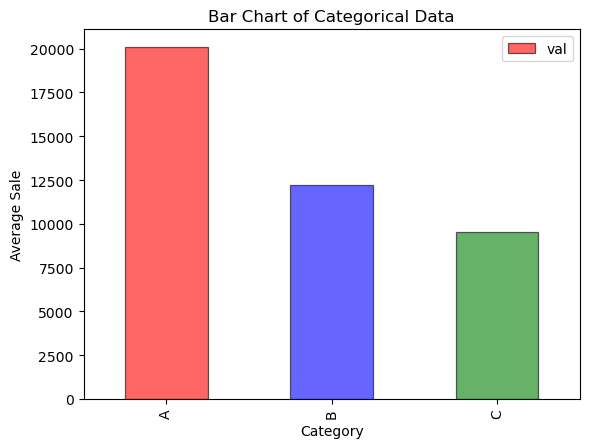

In [6]:
avg_a = df_sales[df_sales.type =='A'].weekly_sales.mean()
avg_b = df_sales[df_sales.type =='B'].weekly_sales.mean()
avg_c = df_sales[df_sales.type =='C'].weekly_sales.mean()

data = {'cat':['A', 'B', 'C'],
       'val':[avg_a, avg_b, avg_c]}
df = pd.DataFrame(data)

# Plot a bar chart
df.plot.bar(x='cat', y='val', color=['red','blue','green'],
            edgecolor='black', alpha=0.6, linewidth=.9)
plt.xlabel('Category')
plt.ylabel('Average Sale')
plt.title('Bar Chart of Categorical Data')
plt.show()

In [7]:
#create dataframe using groupby method
store_typewise_sales = df_sales.groupby('type')['weekly_sales'].sum().reset_index()

# Disable scientific notation for display
pd.set_option('display.float_format', '{:.1f}'.format)

# Convert Sales to millions 
store_typewise_sales['weekly_sales(million)'] =store_typewise_sales['weekly_sales']/ 1_000_000

store_typewise_sales

,type,weekly_sales,weekly_sales(million)
0,A,4331014722.8,4331.0
1,B,2000700736.8,2000.7
2,C,405503527.5,405.5


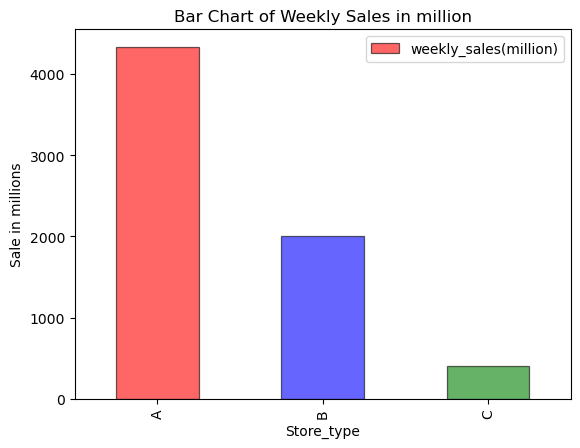

In [8]:

# Plot a bar chart
store_typewise_sales.plot.bar(x='type', y='weekly_sales(million)', color=['red','blue','green'],
            edgecolor='black', alpha=0.6, linewidth=.9)

plt.xlabel('Store_type')
plt.ylabel('Sale in millions')
plt.title('Bar Chart of Weekly Sales in million')
plt.show()

#### Specific Stores and Departments with Highest Sales

In [29]:
# Prepare DataFrame (groupby)method
dept_wise_sales = df_sales.groupby(['dept','type'])[['weekly_sales']].sum().reset_index()

# Disable scientific notation for display
pd.set_option('display.float_format', '{:.1f}'.format)

# Convert sales into millions
dept_wise_sales['weekly_sales(million)']= dept_wise_sales['weekly_sales']/1_000_000

# DataFrames

dept_wise_sales_A= dept_wise_sales[(dept_wise_sales.type == 'A') & (dept_wise_sales['weekly_sales(million)']>70)].sort_values(by = 'weekly_sales(million)')

dept_wise_sales

,dept,type,weekly_sales,weekly_sales(million)
0,1,A,72222369.3,72.2
1,1,B,43735819.9,43.7
2,1,C,7680587.3,7.7
3,2,A,163575247.2,163.6
4,2,B,104659404.5,104.7
...,...,...,...,...
222,98,B,584785.2,0.6
223,98,C,4701632.4,4.7
224,99,A,357666.3,0.4
225,99,B,308.6,0.0


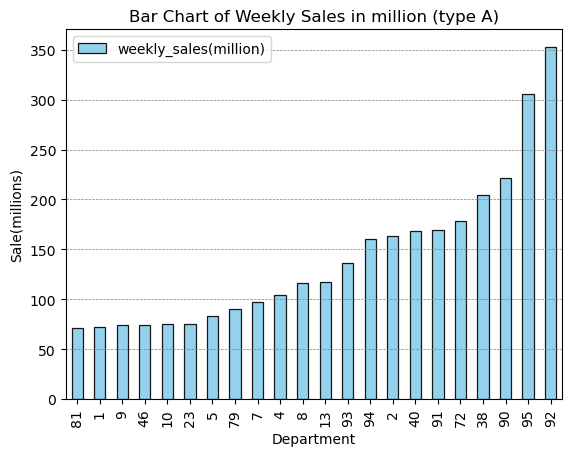

In [30]:
# Plot a bar chart A
dept_wise_sales_A.plot.bar(x='dept', y='weekly_sales(million)', color=['skyblue'],
            edgecolor='black', alpha=0.9, linewidth=.9)

# Customize the grid
plt.grid(color='gray', linestyle='--', linewidth=.5, axis='y')

plt.xlabel('Department')
plt.ylabel('Sale(millions)')
plt.title('Bar Chart of Weekly Sales in million (type A)')
plt.show()

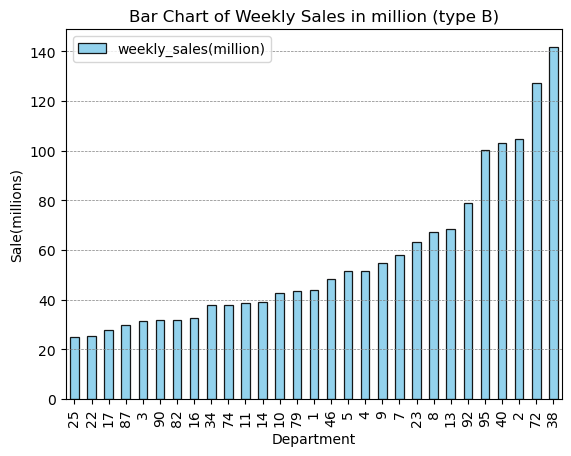

In [31]:
dept_wise_sales_B = dept_wise_sales[(dept_wise_sales.type == 'B') & (dept_wise_sales['weekly_sales(million)']>25)].sort_values(by = 'weekly_sales(million)')
# Plot a bar chart B

dept_wise_sales_B.plot.bar(x='dept', y='weekly_sales(million)', color=['skyblue'],
            edgecolor='black', alpha=0.9, linewidth=.9)

# Customize the grid
plt.grid(color='gray', linestyle='--', linewidth=.5, axis='y')

plt.xlabel('Department')
plt.ylabel('Sale(millions)')
plt.title('Bar Chart of Weekly Sales in million (type B)')
plt.show()

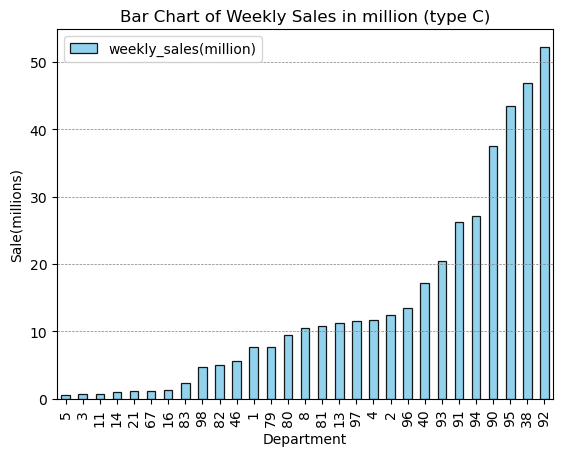

In [32]:
dept_wise_sales_C = dept_wise_sales[(dept_wise_sales.type == 'C') & (dept_wise_sales['weekly_sales(million)']>=.5)].sort_values(by = 'weekly_sales(million)')


# Plot a bar chart C
dept_wise_sales_C.plot.bar(x='dept', y='weekly_sales(million)', color=['skyblue'],
            edgecolor='black', alpha=0.9, linewidth=.9)

# Customize the grid
plt.grid(color='gray', linestyle='--', linewidth=.5, axis='y')


plt.xlabel('Department')
plt.ylabel('Sale(millions)')
plt.title('Bar Chart of Weekly Sales in million (type C)')
plt.show()

In [33]:
dept_wise_sales_A

,dept,type,weekly_sales,weekly_sales(million)
182,81,A,70810850.3,70.8
0,1,A,72222369.3,72.2
24,9,A,73685010.9,73.7
126,46,A,74285803.3,74.3
27,10,A,74742454.6,74.7
63,23,A,74915762.0,74.9
12,5,A,83492740.7,83.5
176,79,A,90383435.5,90.4
18,7,A,96853926.4,96.9
9,4,A,103735619.1,103.7


### store-wise 

In [52]:
# groupby method
storewise_sales = df_sales.groupby('store')['weekly_sales'].sum().reset_index()

# Disable scientific notation for display
pd.set_option('display.float_format', '{:.1f}'.format)

storewise_sales['weekly_sales(million)'] = storewise_sales['weekly_sales']/1_000_000

In [53]:
storewise_sales.head()

,store,weekly_sales,weekly_sales(million)
0,1,222402808.8,222.4
1,2,275382441.0,275.4
2,3,57586735.1,57.6
3,4,299543953.4,299.5
4,5,45475688.9,45.5


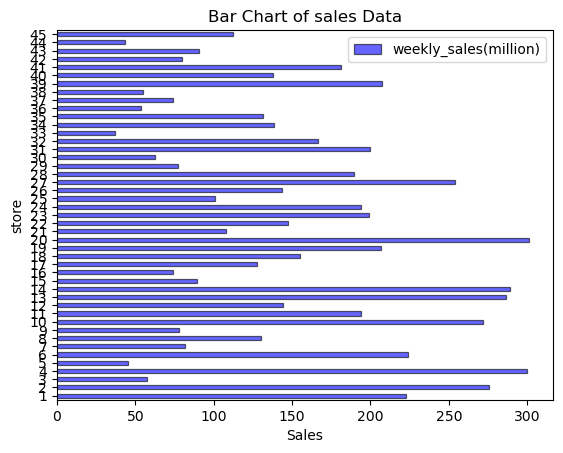

In [54]:
# plotting rough horizontal bar chart
storewise_sales.plot.barh(x='store', y= 'weekly_sales(million)',color='blue',
               edgecolor='black', alpha=0.6, linewidth=.9)

plt.xlabel('Sales')
plt.ylabel('store')
plt.title('Bar Chart of sales Data')
plt.show()

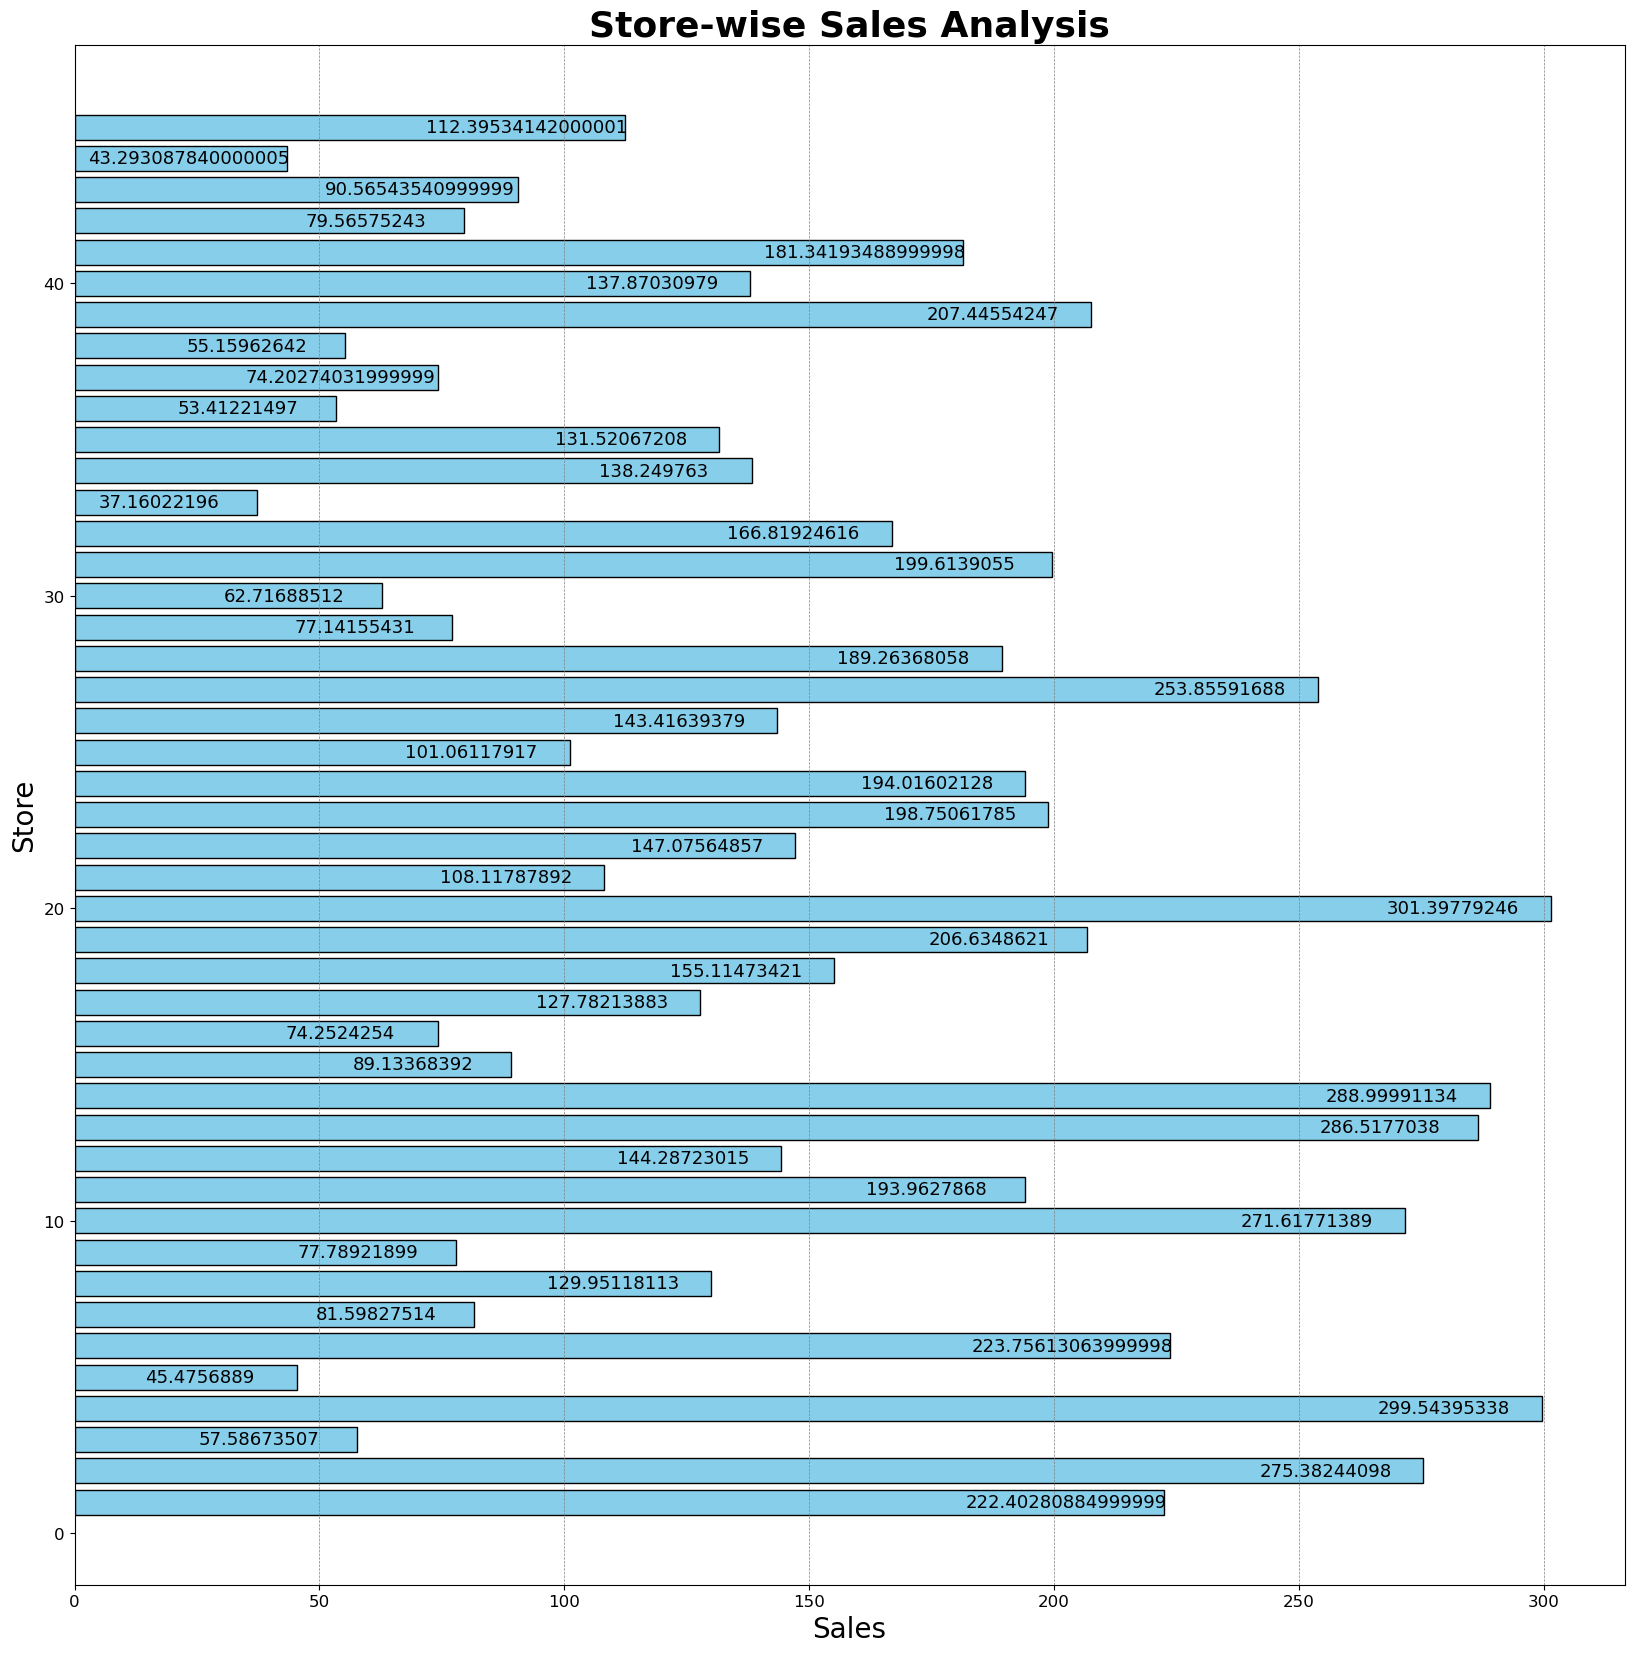

In [70]:
# stylingj of bar chart

import pandas as pd
import matplotlib.pyplot as plt


# DataFrame
storewise_sales

# Plotting with styling
fig, ax = plt.subplots(figsize=(20, 20))

# Create horizontal bar plot
bars = ax.barh(storewise_sales['store'], storewise_sales['weekly_sales(million)'],
               color='skyblue', edgecolor='black')

# Add titles and labels
ax.set_title('Store-wise Sales Analysis', fontsize=26, fontweight='bold')
ax.set_xlabel('Sales', fontsize=20)
ax.set_ylabel('Store', fontsize=20)

# Customize the grid
ax.grid(color='gray', linestyle='--', linewidth=.5, axis='x')

# Add values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width-20, bar.get_y() + bar.get_height() / 2,
            f'{width:,}', ha='center', va='center', fontsize=13)

# Customize the axis ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()


### department-wise sales

In [38]:
# Prepare DataFrame (groupby)method
dept_wise_sales = df_sales.groupby('dept')['weekly_sales'].sum().reset_index()

# Disable scientific notation for display
pd.set_option('display.float_format', '{:.1f}'.format)

# Convert sales into millions
dept_wise_sales['weekly_sales(million)']= dept_wise_sales['weekly_sales']/1_000_000

dept_wise_sales

,dept,weekly_sales,weekly_sales(million)
0,1,123638776.5,123.6
1,2,280611174.4,280.6
2,3,75892450.0,75.9
3,4,167146745.6,167.1
4,5,135607358.6,135.6
...,...,...,...
76,95,449320162.5,449.3
77,96,73833916.2,73.8
78,97,89496511.9,89.5
79,98,39828919.4,39.8


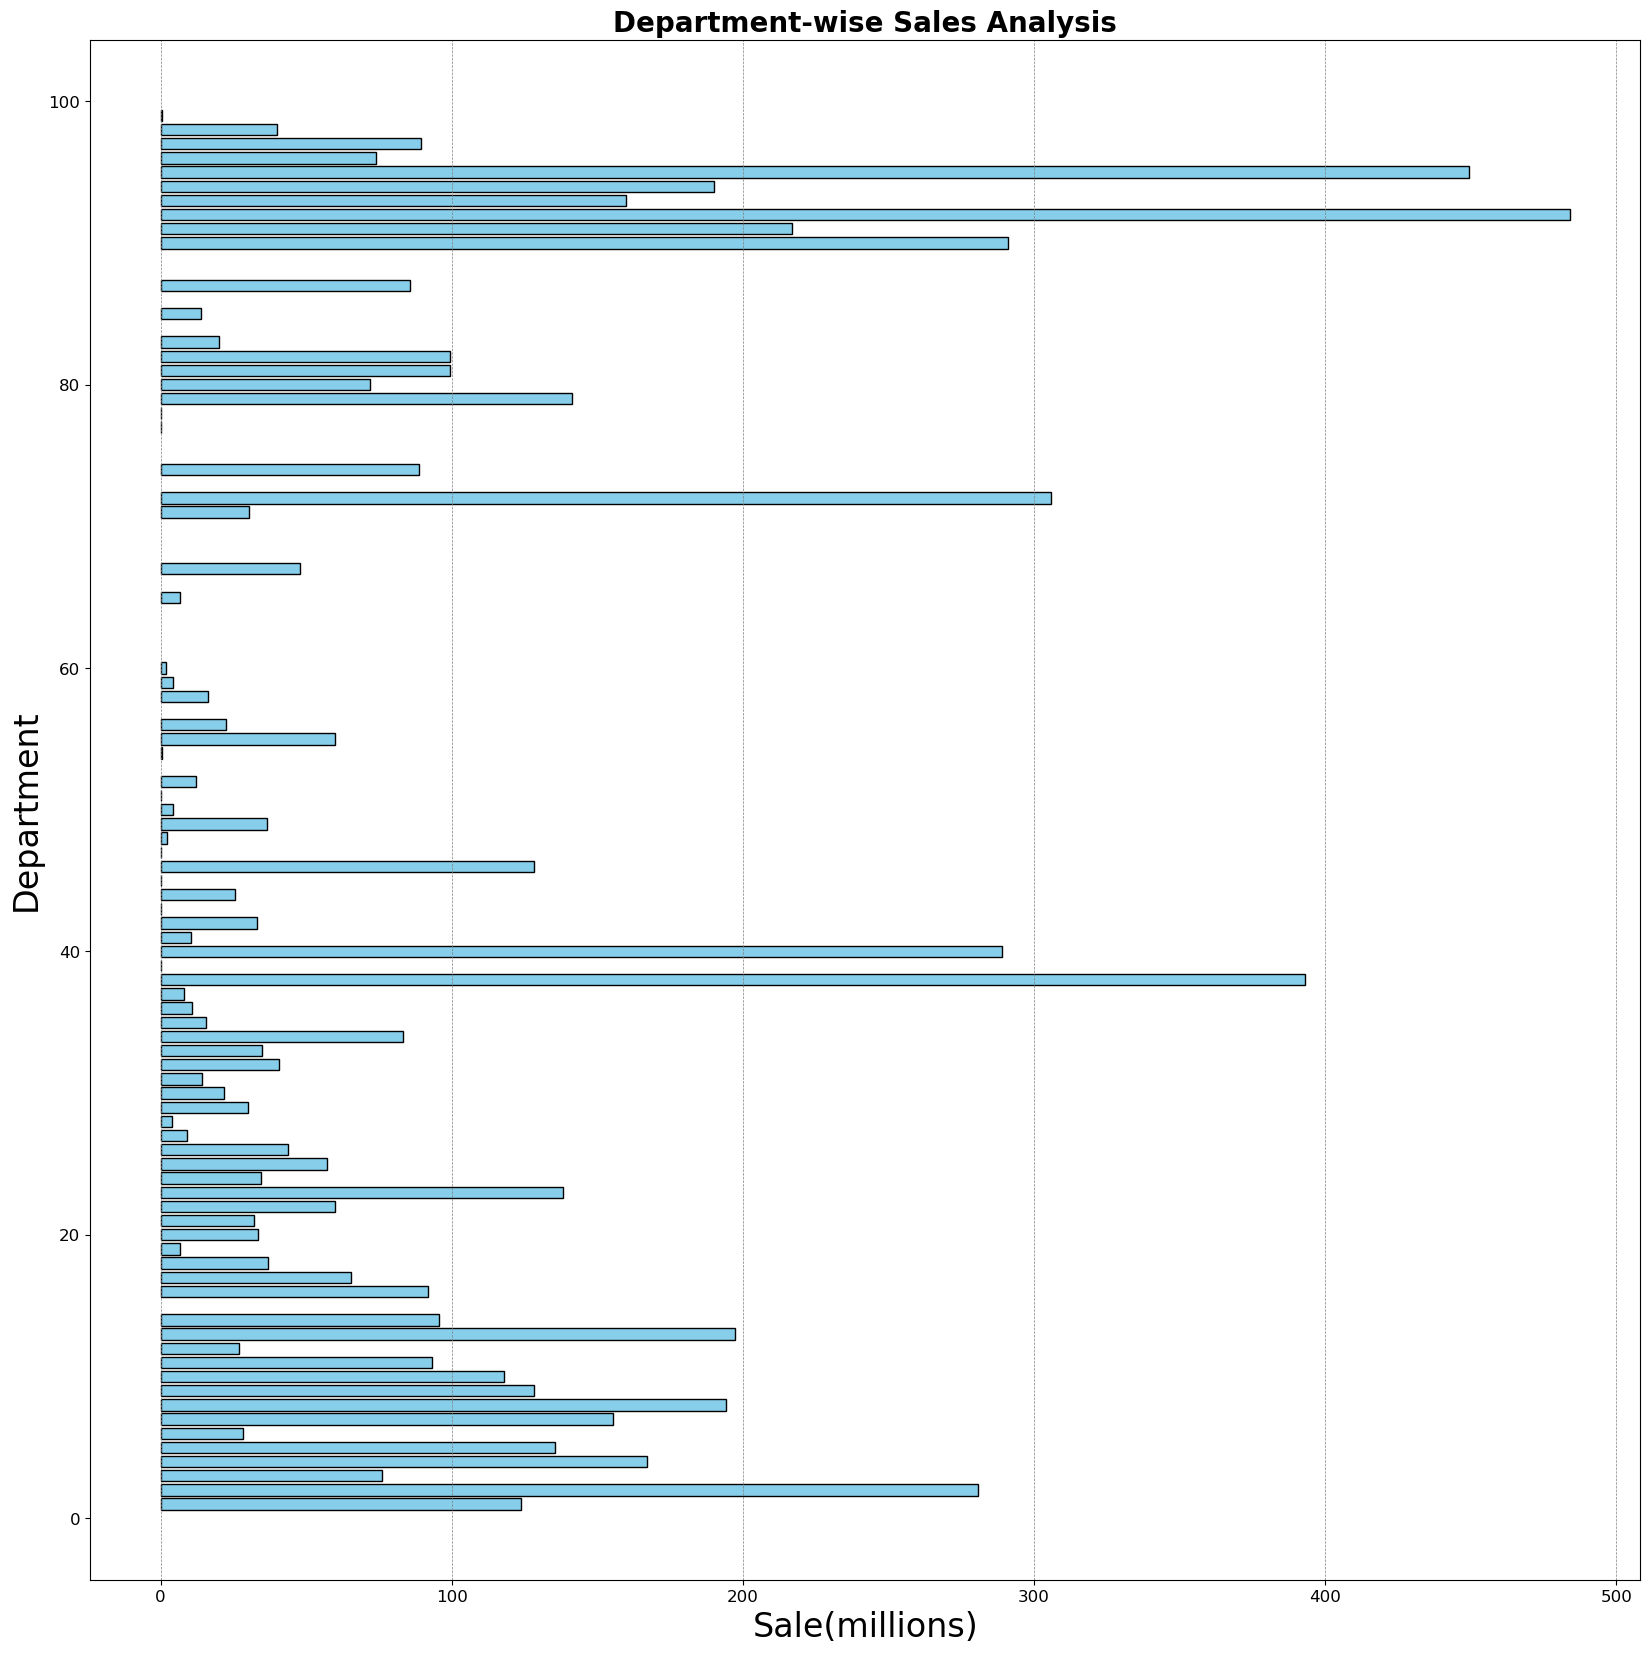

In [39]:
# DataFrame
dept_wise_sales

# Plotting with styling
fig, ax = plt.subplots(figsize=(20, 20))

# Create horizontal bar plot
bars = ax.barh(dept_wise_sales['dept'], dept_wise_sales['weekly_sales(million)'],
               color='skyblue', edgecolor='black')

# Add titles and labels
ax.set_title('Department-wise Sales Analysis', fontsize=20, fontweight='bold')
ax.set_xlabel('Sale(millions)', fontsize=24)
ax.set_ylabel('Department', fontsize=24)

# Customize the grid
ax.grid(color='gray', linestyle='--', linewidth=.5, axis='x')


# Customize the axis ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

### Sale based on size of store

In [40]:
# Prepare DataFrame
sale_by_size = df_sales.groupby('size')['weekly_sales'].sum().reset_index()

# Disable Scientific notation to display the number
pd.set_option('display.float_format', '{:.1f}'.format)

# Convert sale into million
sale_by_size['weekly_sales(million)'] = sale_by_size['weekly_sales']/1_000_000

# Convert store size into thousand(1k = 1000)
sale_by_size['size(10k)'] = sale_by_size['size']/10_000

sale_by_size.head()

,size,weekly_sales,weekly_sales(million),size(10k)
0,34875,45475688.9,45.5,3.5
1,37392,57586735.1,57.6,3.7
2,39690,171885600.8,171.9,4.0
3,39910,170908043.1,170.9,4.0
4,41062,90565435.4,90.6,4.1


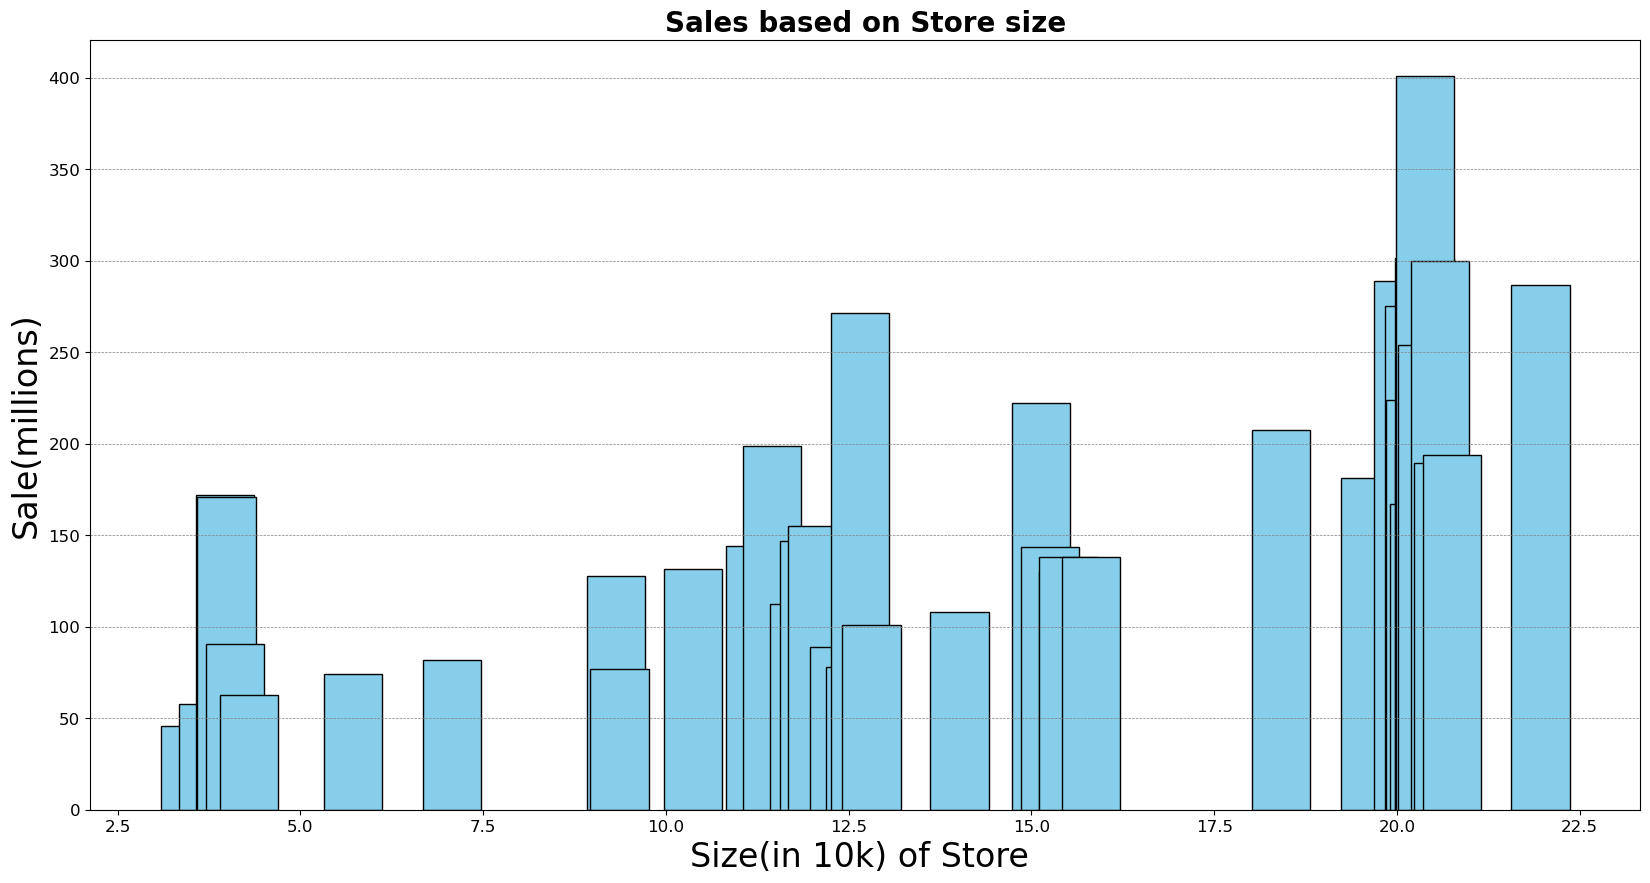

In [41]:
# DataFrame
sale_by_size

# Plotting with styling
fig, ax = plt.subplots(figsize=(20, 10))

# Create horizontal bar plot
bars = ax.bar(sale_by_size['size(10k)'], sale_by_size['weekly_sales(million)'],
               color='skyblue', edgecolor='black')

# # Add titles and labels
ax.set_title('Sales based on Store size', fontsize=20, fontweight='bold')
ax.set_ylabel('Sale(millions)', fontsize=24)
ax.set_xlabel('Size(in 10k) of Store ', fontsize=24)

# Customize the grid
ax.grid(color='gray', linestyle='--', linewidth=.5, axis='y')


# Customize the axis ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

### Identifying how much sales increase during holidays